In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

Training the same model on MNIST data with noise channels or all-zero channels

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 8s 20ms/step - loss: 0.5999 - accuracy: 0.8154 - val_loss: 0.3090 - val_accuracy: 0.9036
Epoch 2/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2466 - accuracy: 0.9236 - val_loss: 0.1933 - val_accuracy: 0.9423
Epoch 1/2
375/375 [==============================] - 8s 21ms/step - loss: 0.2923 - accuracy: 0.9149 - val_loss: 0.1521 - val_accuracy: 0.9563
Epoch 2/2
375/375 [==============================] - 8s 20ms/step - loss: 0.1212 - accuracy: 0.9645 - val_loss: 0.1108 - val_accuracy: 0.9678


In [ ]:
history_noise

In [ ]:
history_zeros

Plotting a validation accuracy comparison

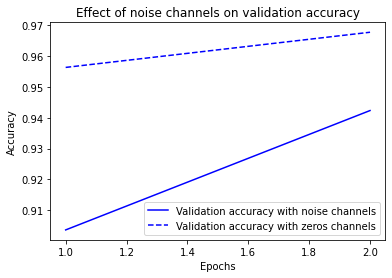

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


The nature of generalization in deep learning
Fitting a MNIST model with randomly shuffled labels



In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3169 - accuracy: 0.1050 - val_loss: 2.3087 - val_accuracy: 0.1020
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 2.2993 - accuracy: 0.1176 - val_loss: 2.3164 - val_accuracy: 0.1027


Training a MNIST model with an incorrectly high learning rate

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 912.9728 - accuracy: 0.3990 - val_loss: 2.2646 - val_accuracy: 0.2703
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 4.0928 - accuracy: 0.2920 - val_loss: 8.9212 - val_accuracy: 0.3067


The same model with a more appropriate learning rate

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 0.3683 - accuracy: 0.9123 - val_loss: 0.1391 - val_accuracy: 0.9618
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 0.1422 - accuracy: 0.9633 - val_loss: 0.1456 - val_accuracy: 0.9646


A simple logistic regression on MNIST

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.6785 - accuracy: 0.8324 - val_loss: 0.3605 - val_accuracy: 0.9050
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.9024 - val_loss: 0.3116 - val_accuracy: 0.9127


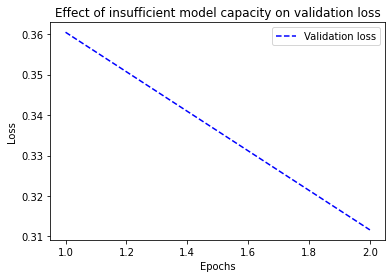

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 6ms/step - loss: 0.3711 - accuracy: 0.8946 - val_loss: 0.1861 - val_accuracy: 0.9480
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1651 - accuracy: 0.9512 - val_loss: 0.1350 - val_accuracy: 0.9612


Regularizing your model
Reducing the network's size
Original model

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/2
30/30 [==============================] - 5s 137ms/step - loss: 0.5500 - accuracy: 0.7816 - val_loss: 0.4236 - val_accuracy: 0.8637
Epoch 2/2
30/30 [==============================] - 1s 40ms/step - loss: 0.3431 - accuracy: 0.8971 - val_loss: 0.3222 - val_accuracy: 0.8882


Version of the model with lower capacity

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 45ms/step - loss: 0.6009 - accuracy: 0.7239 - val_loss: 0.5310 - val_accuracy: 0.8273
Epoch 2/2
30/30 [==============================] - 1s 34ms/step - loss: 0.4721 - accuracy: 0.8587 - val_loss: 0.4466 - val_accuracy: 0.8592


Version of the model with higher capacity

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 10s 313ms/step - loss: 0.5559 - accuracy: 0.7389 - val_loss: 0.3190 - val_accuracy: 0.8805
Epoch 2/2
30/30 [==============================] - 10s 330ms/step - loss: 0.2580 - accuracy: 0.9001 - val_loss: 0.3447 - val_accuracy: 0.8569


Adding L2 weight regularization to the model

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 51ms/step - loss: 0.5841 - accuracy: 0.7925 - val_loss: 0.4517 - val_accuracy: 0.8789
Epoch 2/2
30/30 [==============================] - 1s 39ms/step - loss: 0.3953 - accuracy: 0.8959 - val_loss: 0.3901 - val_accuracy: 0.8862


Different weight regularizers available in Keras

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Adding dropout to the IMDB model

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 50ms/step - loss: 0.6169 - accuracy: 0.6564 - val_loss: 0.4711 - val_accuracy: 0.8544
Epoch 2/2
30/30 [==============================] - 1s 39ms/step - loss: 0.4801 - accuracy: 0.7835 - val_loss: 0.3659 - val_accuracy: 0.8743
